<a href="https://colab.research.google.com/github/jeojildo/trainingdata/blob/main/trainingfordissertationjp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Selection**

In [49]:
!pip install beautifulsoup4 requests

In [50]:
#se ita hakarak asesu ba github publico entaun ezemplo maka iha kraik nee
#se ita karik uza github privado sei presiza raw file nb request hodi hetan licensa ba uza rawfile iha github refere
import requests
from bs4 import BeautifulSoup

#import library request
#to reques http to the internet for the url file (github) (request file xml to the github)



#read file training in github repository
trainingcl='https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias.xml'

r= requests.get(trainingcl)
soup = BeautifulSoup(r.content, 'xml')

In [51]:
#read xml file with beautiful code
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<publicacoes>
 <publicacao>
  <ano>
   2014
  </ano>
  <titulo>
   Clustering student data with k-means
  </titulo>
  <coautores>
   <autor>
    Cordeiro dos Santos Filho, Reginaldo.
   </autor>
   <autor>
    Pereira, J.
   </autor>
   <autor>
    Armando Dlima Viana, Joaquim
   </autor>
  </coautores>
 </publicacao>
 <publicacao>
  <ano>
   2015
  </ano>
  <titulo>
   Visualization redes de coautorias
  </titulo>
  <coautores>
   <autor>
    Cordeiro dos Santos Filho, Reginaldo.
   </autor>
   <autor>
    Pereira, J.
   </autor>
   <autor>
    Mateus dos Reis Matos, Helder.
   </autor>
  </coautores>
 </publicacao>
 <publicacao>
  <ano>
   2015
  </ano>
  <titulo>
   Classification prizes of house
  </titulo>
  <coautores>
   <autor>
    Jose Sousa da Silva, Rodrigo
   </autor>
   <autor>
    Pereira, J.
   </autor>
   <autor>
    Mateus dos Reis Matos, Helder.
   </autor>
   <autor>
    Cardoso Azevedo, Atílio
   </autor>
  </coautores>
 </publ

In [54]:
from bs4 import BeautifulSoup
import requests

# URL file XML di GitHub
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias.xml'
response = requests.get(url)

# Parsing XML dengan BeautifulSoup
soup = BeautifulSoup(response.content, 'xml')

# Ambil semua publikasi
publicacoes = soup.find_all('publicacao')

# Iterasi dan cetak isi setiap publicação
for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores = [a.text.strip() for a in pub.find_all('autor')]

    print(f"{ano} - {titulo}")
    print("Autores:", ", ".join(autores))
    print()

2014 - Clustering student data with k-means
Autores: Cordeiro dos Santos Filho, Reginaldo., Pereira, J., Armando Dlima Viana, Joaquim

2015 - Visualization redes de coautorias
Autores: Cordeiro dos Santos Filho, Reginaldo., Pereira, J., Mateus dos Reis Matos, Helder.

2015 - Classification prizes of house
Autores: Jose Sousa da Silva, Rodrigo, Pereira, J., Mateus dos Reis Matos, Helder., Cardoso Azevedo, Atílio

2016 - Using K-Nearest Neighbord for
Autores: Carlos de Carvalho, Jean, Pereira, J., Mateus dos Reis Matos, Helder., Cardoso Azevedo, Atílio, Heloísa Pinheiro Silva, Maria

2017 - Classification email using naive bayes
Autores: Jose Sousa da Silva, Rodrigo, Pereira, J., Mateus dos Reis Matos, Helder., Cardoso Azevedo, Atílio, Lima de Sousa, Samara



In [59]:
from bs4 import BeautifulSoup
import requests
import pandas as pd # Untuk membaca data dari gambar tabel jika diperlukan, atau Anda bisa hardcode

# --- Bagian 1: Siapkan data pencocokan autor ---
# Diasumsikan Anda memiliki data ini dalam bentuk yang bisa dibaca.
# Jika ini dari gambar, Anda perlu memasukkannya secara manual atau menggunakan OCR/metode lain.
# Untuk tujuan demonstrasi, saya akan hardcode data dari gambar yang Anda berikan.

# Data autor yang Anda berikan
# Baris pertama adalah header, jadi kita mulai dari baris kedua.
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atilio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

# Buat kamus untuk pencarian cepat.
# Kunci akan menjadi semua variasi nama autor, dan nilainya adalah nama 'resmi' dari kolom 'nome'.
# Kita juga akan menyertakan nama 'resmi' sebagai kunci.
autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    # Tambahkan nama utama sebagai kunci
    autor_lookup[main_name.lower()] = main_name # Menggunakan lowercase untuk pencocokan case-insensitive

    # Tambahkan semua nama_citacoes sebagai kunci
    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        autor_lookup[cit.lower()] = main_name # Menggunakan lowercase untuk pencocokan case-insensitive

# --- Bagian 2: Ambil dan proses data XML (dari kode Anda sebelumnya) ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

print("--- Hasil Pencocokan Autor ---")
print("-" * 30)

# Iterasi dan cetak isi setiap publikasi
for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml:
        # Coba cocokkan autor dari XML dengan daftar kita
        # Gunakan lower() untuk pencocokan yang tidak sensitif huruf besar/kecil
        found_match = False
        if autor_name_from_xml.lower() in autor_lookup:
            matched_autores.append(autor_lookup[autor_name_from_xml.lower()])
            found_match = True
        else:
            # Jika tidak cocok persis, coba cek apakah ada bagian dari nama_citacoes yang cocok
            # Ini mungkin lebih kompleks dan bisa menghasilkan false positive,
            # jadi kita mulai dengan pencocokan eksak terlebih dahulu.
            # Untuk skenario ini, kita anggap pencocokan eksak sudah cukup.
            pass # Anda bisa menambahkan logika pencocokan fuzzy di sini jika diperlukan

        if not found_match:
            unmatched_autores.append(autor_name_from_xml)

    print(f"Tahun: {ano}")
    print(f"Judul: {titulo}")
    if matched_autores:
        print("Autores Teridentifikasi (Daftar Anda):", ", ".join(set(matched_autores))) # Menggunakan set untuk menghindari duplikasi jika ada beberapa citacoes yang cocok ke nama yang sama
    else:
        print("Autores Teridentifikasi (Daftar Anda): Tidak ada yang cocok")

    if unmatched_autores:
        print("Autores Tidak Teridentifikasi (di luar daftar Anda):", ", ".join(unmatched_autores))
    print("-" * 30) # Garis pemisah antar publikasi

--- Hasil Pencocokan Autor ---
------------------------------
Tahun: 2014
Judul: Clustering student data with k-means
Autores Teridentifikasi (Daftar Anda): Jeojildo Pereira, Joaquim Armando Dlima Viana
Autores Tidak Teridentifikasi (di luar daftar Anda): Cordeiro dos Santos Filho, Reginaldo.
------------------------------
Tahun: 2015
Judul: Visualization redes de coautorias
Autores Teridentifikasi (Daftar Anda): Jeojildo Pereira
Autores Tidak Teridentifikasi (di luar daftar Anda): Cordeiro dos Santos Filho, Reginaldo., Mateus dos Reis Matos, Helder.
------------------------------
Tahun: 2015
Judul: Classification prizes of house
Autores Teridentifikasi (Daftar Anda): Jeojildo Pereira
Autores Tidak Teridentifikasi (di luar daftar Anda): Jose Sousa da Silva, Rodrigo, Mateus dos Reis Matos, Helder., Cardoso Azevedo, Atílio
------------------------------
Tahun: 2016
Judul: Using K-Nearest Neighbord for
Autores Teridentifikasi (Daftar Anda): Jeojildo Pereira, Jean Carlos de Carvalho Costa


In [63]:
#nome dos coautores no xml file tem que igual na lista de coautores
#acento nu'udar problema ida ne'ebe tem que resolve, atu nune'e bainhira verifika husi xml file ho lista(iha dict or list python nian) labele liu, maibe bele detecta ho los
#pois atensaun fali ho problema seluk.

from bs4 import BeautifulSoup
import requests
import re # Import modul regex untuk normalisasi string

#Bagian 1: Siapkan data pencocokan autor ---
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atílio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

#Fungsi normalisasi untuk menghapus tanda baca dan spasi berlebih
def normalize_name(name):
    name = name.lower() # Ubah ke huruf kecil
    name = re.sub(r'[.,;]', '', name) # Hapus titik, koma, dan titik koma
    name = re.sub(r'\s+', ' ', name) # Ganti spasi berlebih dengan satu spasi
    return name.strip() # Hapus spasi di awal/akhir

autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    normalized_main_name = normalize_name(main_name)

    autor_lookup[normalized_main_name] = main_name

    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        normalized_cit = normalize_name(cit)
        autor_lookup[normalized_cit] = main_name

#Bagian 2: Ambil dan proses data XML ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

print("--- Hasil Pencocokan Autor ---")
print("-" * 30)

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml:
        normalized_autor_xml = normalize_name(autor_name_from_xml)

        found_match = False
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
            found_match = True

        if not found_match:
            unmatched_autores.append(autor_name_from_xml)

    print(f"Tahun: {ano}")
    print(f"Judul: {titulo}")
    if matched_autores:
        #Menggunakan set untuk menghindari duplikasi jika ada beberapa citacoes yang cocok ke nama yang sama
        print("Autores Teridentifikasi  ou coautorias identificado(Daftar Anda):", ", ".join(sorted(list(set(matched_autores)))))
    else:
        print("Autores Teridentifikasi (Daftar Anda): Tidak ada yang cocok")

    if unmatched_autores:
        print("Autores Tidak Teridentifikasi coautorias nao identificado (di luar daftar Anda):", ", ".join(unmatched_autores))
    print("-" * 30)

--- Hasil Pencocokan Autor ---
------------------------------
Tahun: 2014
Judul: Clustering student data with k-means
Autores Teridentifikasi  ou coautorias identificado(Daftar Anda): Jeojildo Pereira, Joaquim Armando Dlima Viana, Reginaldo Cordeiro dos Santos Filho
------------------------------
Tahun: 2015
Judul: Visualization redes de coautorias
Autores Teridentifikasi  ou coautorias identificado(Daftar Anda): Helder Mateus dos Reis Matos, Jeojildo Pereira, Reginaldo Cordeiro dos Santos Filho
------------------------------
Tahun: 2015
Judul: Classification prizes of house
Autores Teridentifikasi  ou coautorias identificado(Daftar Anda): Atílio Cardoso Azevedo, Helder Mateus dos Reis Matos, Jeojildo Pereira
Autores Tidak Teridentifikasi coautorias nao identificado (di luar daftar Anda): Jose Sousa da Silva, Rodrigo
------------------------------
Tahun: 2016
Judul: Using K-Nearest Neighbord for
Autores Teridentifikasi  ou coautorias identificado(Daftar Anda): Atílio Cardoso Azevedo, H

In [65]:
#coautor iha 2 (1. laiha lista no 1 seluk tanba coautor ida deit ne'ebe preciso exluir ou lalika uza)

from bs4 import BeautifulSoup
import requests
import re # Import modul regex untuk normalisasi string

# Bagian 1: Siapkan data pencocokan autor ---
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atílio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

# Fungsi normalisasi untuk menghapus tanda baca dan spasi berlebih
def normalize_name(name):
    name = name.lower() # Ubah ke huruf kecil
    name = re.sub(r'[.,;]', '', name) # Hapus titik, koma, dan titik koma
    name = re.sub(r'\s+', ' ', name) # Ganti spasi berlebih dengan satu spasi
    return name.strip() # Hapus spasi di awal/akhir

autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    normalized_main_name = normalize_name(main_name)

    autor_lookup[normalized_main_name] = main_name

    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        normalized_cit = normalize_name(cit)
        autor_lookup[normalized_cit] = main_name

# Bagian 2: Ambil dan proses data XML ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias3.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

print("--- Hasil Pencocokan Autor ---")
print("-" * 30)

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    # Tambahan: Periksa jika hanya ada 1 autor
    is_single_author = (len(autores_xml) == 1)
    single_author_info = None

    for autor_name_from_xml in autores_xml:
        normalized_autor_xml = normalize_name(autor_name_from_xml)

        found_match = False
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
            found_match = True

        # Jika ini adalah publikasi dengan 1 autor, simpan informasinya
        if is_single_author:
            # Pastikan nama autor tunggal juga dicek di daftar Anda
            if found_match:
                single_author_info = {"name": autor_lookup[normalized_autor_xml], "matched": True}
            else:
                single_author_info = {"name": autor_name_from_xml, "matched": False}

        if not found_match:
            unmatched_autores.append(autor_name_from_xml)

    print(f"Tahun: {ano}")
    print(f"Judul: {titulo}")

    if is_single_author:
        print("Status Publikasi: Publikasi dengan 1 autor.")
        if single_author_info["matched"]:
            print(f"  Autor Tunggal Teridentifikasi (Daftar Anda): {single_author_info['name']}")
        else:
            print(f"  Autor Tunggal Tidak Teridentifikasi (di luar daftar Anda): {single_author_info['name']}")
        print("  (Tidak akan digunakan untuk analisis coauthorship lebih lanjut)")
    else:
        print("Status Publikasi: Publikasi dengan co-authorship.")
        if matched_autores:
            print("  Coautores Teridentifikasi (Daftar Anda):", ", ".join(sorted(list(set(matched_autores)))))
        else:
            print("  Coautores Teridentifikasi (Daftar Anda): Tidak ada yang cocok")

        if unmatched_autores:
            print("  Coautores Tidak Teridentifikasi (di luar daftar Anda):", ", ".join(unmatched_autores))
    print("-" * 30)

--- Hasil Pencocokan Autor ---
------------------------------
Tahun: 2014
Judul: Clustering student data with k-means
Status Publikasi: Publikasi dengan co-authorship.
  Coautores Teridentifikasi (Daftar Anda): Jeojildo Pereira, Joaquim Armando Dlima Viana, Reginaldo Cordeiro dos Santos Filho
------------------------------
Tahun: 2015
Judul: Visualization redes de coautorias
Status Publikasi: Publikasi dengan co-authorship.
  Coautores Teridentifikasi (Daftar Anda): Helder Mateus dos Reis Matos, Jeojildo Pereira, Reginaldo Cordeiro dos Santos Filho
------------------------------
Tahun: 2015
Judul: Classification prizes of house
Status Publikasi: Publikasi dengan co-authorship.
  Coautores Teridentifikasi (Daftar Anda): Atílio Cardoso Azevedo, Helder Mateus dos Reis Matos, Jeojildo Pereira
  Coautores Tidak Teridentifikasi (di luar daftar Anda): Jose Sousa da Silva, Rodrigo
------------------------------
Tahun: 2016
Judul: Using K-Nearest Neighbord for
Status Publikasi: Publikasi dengan

In [66]:
#coautor iha 2 (1. laiha lista no 1 seluk tanba coautor ida deit ne'ebe preciso exluir ou lalika uza)
#halo diak liu tan (karik?)

from bs4 import BeautifulSoup
import requests
import re # Import modul regex untuk normalisasi string

# Bagian 1: Siapkan data pencocokan autor ---
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atílio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

# Fungsi normalisasi untuk menghapus tanda baca dan spasi berlebih
def normalize_name(name):
    name = name.lower() # Ubah ke huruf kecil
    name = re.sub(r'[.,;]', '', name) # Hapus titik, koma, dan titik koma
    name = re.sub(r'\s+', ' ', name) # Ganti spasi berlebih dengan satu spasi
    return name.strip() # Hapus spasi di awal/akhir

autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    normalized_main_name = normalize_name(main_name)

    autor_lookup[normalized_main_name] = main_name

    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        normalized_cit = normalize_name(cit)
        autor_lookup[normalized_cit] = main_name

# Bagian 2: Ambil dan proses data XML ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias3.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

print("--- Hasil Pencocokan Autor ---")
print("-" * 30)

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml:
        normalized_autor_xml = normalize_name(autor_name_from_xml)

        found_match = False
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
            found_match = True

        if not found_match:
            unmatched_autores.append(autor_name_from_xml)

    # Dapatkan daftar unik autor yang cocok dari daftar Anda
    unique_matched_autores = list(set(matched_autores))

    # Logika baru: Cek apakah hanya satu autor dari DAFTAR ANDA yang teridentifikasi
    # Ini berbeda dengan hanya memeriksa jumlah total autor di XML.
    is_single_identified_author = (len(unique_matched_autores) == 1) and (len(autores_xml) > 1)

    print(f"Tahun: {ano}")
    print(f"Judul: {titulo}")

    if is_single_identified_author:
        print("Status Publikasi: Publikasi dengan co-authorship (hanya 1 autor dari daftar Anda yang teridentifikasi).")
        print(f"  Autor Teridentifikasi (Daftar Anda): {unique_matched_autores[0]}")
        if unmatched_autores:
            print("  Autores Tidak Teridentifikasi (di luar daftar Anda):", ", ".join(unmatched_autores))
        print("  (Tidak akan digunakan untuk analisis coauthorship lebih lanjut)")
    else:
        # Jika bukan kasus 'single_identified_author' khusus
        print("Status Publikasi: Publikasi dengan co-authorship." if len(autores_xml) > 1 else "Status Publikasi: Publikasi dengan 1 autor.")
        if unique_matched_autores:
            print("  Autores Teridentifikasi (Daftar Anda):", ", ".join(sorted(unique_matched_autores)))
        else:
            print("  Autores Teridentifikasi (Daftar Anda): Tidak ada yang cocok")

        if unmatched_autores:
            print("  Autores Tidak Teridentifikasi (di luar daftar Anda):", ", ".join(unmatched_autores))
    print("-" * 30)

--- Hasil Pencocokan Autor ---
------------------------------
Tahun: 2014
Judul: Clustering student data with k-means
Status Publikasi: Publikasi dengan co-authorship.
  Autores Teridentifikasi (Daftar Anda): Jeojildo Pereira, Joaquim Armando Dlima Viana, Reginaldo Cordeiro dos Santos Filho
------------------------------
Tahun: 2015
Judul: Visualization redes de coautorias
Status Publikasi: Publikasi dengan co-authorship.
  Autores Teridentifikasi (Daftar Anda): Helder Mateus dos Reis Matos, Jeojildo Pereira, Reginaldo Cordeiro dos Santos Filho
------------------------------
Tahun: 2015
Judul: Classification prizes of house
Status Publikasi: Publikasi dengan co-authorship.
  Autores Teridentifikasi (Daftar Anda): Atílio Cardoso Azevedo, Helder Mateus dos Reis Matos, Jeojildo Pereira
  Autores Tidak Teridentifikasi (di luar daftar Anda): Jose Sousa da Silva, Rodrigo
------------------------------
Tahun: 2016
Judul: Using K-Nearest Neighbord for
Status Publikasi: Publikasi dengan co-auth

In [67]:
# ... (kode sebelumnya untuk parsing XML dan autor_lookup) ...
#filter publication
#save selected data

selected_publications_for_coauthorship = []

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml:
        normalized_autor_xml = normalize_name(autor_name_from_xml)
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
        else:
            unmatched_autores.append(autor_name_from_xml)

    unique_matched_autores = list(set(matched_autores))

    # Kriteria Selection untuk analisis coauthorship:
    # Hanya publikasi dengan DUA atau lebih autor yang teridentifikasi dari daftar Anda
    # yang akan dipertimbangkan untuk analisis coauthorship.
    # Anda bisa menyesuaikan kriteria ini sesuai kebutuhan Anda.
    if len(unique_matched_autores) >= 2:
        selected_publications_for_coauthorship.append({
            'tahun': ano,
            'judul': titulo,
            'autores_xml_asli': autores_xml, # Untuk referensi
            'autores_teridentifikasi': unique_matched_autores,
            'autores_tidak_teridentifikasi': unmatched_autores
        })

print(f"\n--- Data Terpilih untuk Analisis Coauthorship ({len(selected_publications_for_coauthorship)} publikasi) ---")
# Sekarang Anda bisa mencetak atau mengolah 'selected_publications_for_coauthorship'
# Atau langsung mengubahnya menjadi DataFrame untuk tahap berikutnya
# import pandas as pd
# df_selected = pd.DataFrame(selected_publications_for_coauthorship)
# print(df_selected.head())


--- Data Terpilih untuk Analisis Coauthorship (5 publikasi) ---


# **Preprocessing**

In [72]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd # Import library pandas

# --- Bagian 1: Siapkan data pencocokan autor ---
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atílio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

def normalize_name(name):
    name = name.lower()
    name = re.sub(r'[.,;]', '', name)
    name = re.sub(r'\s+', ' ', name)
    return name.strip()

autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    normalized_main_name = normalize_name(main_name)
    autor_lookup[normalized_main_name] = main_name

    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        normalized_cit = normalize_name(cit)
        autor_lookup[normalized_cit] = main_name

# --- Bagian 2: Ambil dan proses data XML ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias3.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

# List untuk menyimpan semua data publikasi yang diekstrak dan diproses
all_publications_processed_data = []

print("--- Proses Ekstraksi dan Pencocokan Autor ---")
print("-" * 40)

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml_original = [a.text.strip() for a in pub.find_all('autor')] # Simpan yang original juga

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml_original:
        normalized_autor_xml = normalize_name(autor_name_from_xml)
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
        else:
            unmatched_autores.append(autor_name_from_xml)

    unique_matched_autores = list(set(matched_autores))

    # Tentukan jenis publikasi berdasarkan autor yang teridentifikasi
    is_single_author_in_xml = (len(autores_xml_original) == 1)
    is_single_identified_author = (len(unique_matched_autores) == 1) and (len(autores_xml_original) > 1) # Publikasi multi-autor tapi hanya 1 teridentifikasi

    publikasi_status = ""
    analisis_coauthorship_notes = ""

    if is_single_author_in_xml:
        publikasi_status = "Publikasi dengan 1 autor"
        analisis_coauthorship_notes = "Tidak akan digunakan untuk analisis coauthorship (publikasi tunggal)"
    elif is_single_identified_author:
        publikasi_status = "Co-authorship (hanya 1 autor teridentifikasi dari daftar)"
        analisis_coauthorship_notes = "Tidak akan digunakan untuk analisis coauthorship (hanya 1 autor dari daftar)"
    else:
        publikasi_status = "Co-authorship"
        if len(unique_matched_autores) < 2: # Kurang dari 2 autor teridentifikasi dari daftar
             analisis_coauthorship_notes = "Tidak cukup autor teridentifikasi dari daftar untuk analisis coauthorship"


    # Menyimpan data untuk setiap publikasi
    all_publications_processed_data.append({
        'tahun': int(ano) if ano.isdigit() else None, # Konversi ke int, tangani error
        'judul': titulo,
        'autor_xml_original': "; ".join(autores_xml_original), # Gabungkan menjadi string untuk DataFrame
        'jumlah_autor_xml': len(autores_xml_original),
        'autor_teridentifikasi': "; ".join(unique_matched_autores), # Gabungkan menjadi string
        'jumlah_autor_teridentifikasi': len(unique_matched_autores),
        'autor_tidak_teridentifikasi': "; ".join(unmatched_autores), # Gabungkan menjadi string
        'jumlah_autor_tidak_teridentifikasi': len(unmatched_autores),
        'status_publikasi': publikasi_status,
        'catatan_analisis_coauthorship': analisis_coauthorship_notes
    })

    # Output sementara untuk melihat proses
    print(f"Tahun: {ano}")
    print(f"Judul: {titulo}")
    print(f"  Autores XML Asli: {', '.join(autores_xml_original)}")
    print(f"  Autores Teridentifikasi (Daftar Anda): {', '.join(sorted(unique_matched_autores)) if unique_matched_autores else 'Tidak ada'}")
    print(f"  Autores Tidak Teridentifikasi: {', '.join(unmatched_autores) if unmatched_autores else 'Tidak ada'}")
    print(f"  Status Publikasi: {publikasi_status}")
    print(f"  Catatan: {analisis_coauthorship_notes if analisis_coauthorship_notes else 'Siap untuk analisis coauthorship'}")
    print("-" * 40)

# --- Bagian 3: Siapkan Data untuk Pre-processing dengan Pandas DataFrame ---
df = pd.DataFrame(all_publications_processed_data)

print("\n\n--- Ringkasan Data Siap untuk Pre-processing ---")
print("-" * 40)
print("DataFrame terbentuk dengan", len(df), "baris dan", len(df.columns), "kolom.")
print("\nInformasi DataFrame:")
df.info()

print("\nContoh 5 baris pertama DataFrame:")
print(df.head())

print("\nDistribusi Status Publikasi:")
print(df['status_publikasi'].value_counts())

print("\nDistribusi Catatan Analisis Coauthorship:")
print(df['catatan_analisis_coauthorship'].value_counts())

# Anda bisa menyimpan DataFrame ini ke CSV atau Excel untuk analisis lebih lanjut
# df.to_csv('publikasi_data_siap_preprocessing.csv', index=False)
# print("\nData telah disimpan ke 'publikasi_data_siap_preprocessing.csv'")

--- Proses Ekstraksi dan Pencocokan Autor ---
----------------------------------------
Tahun: 2014
Judul: Clustering student data with k-means
  Autores XML Asli: Cordeiro dos Santos Filho, Reginaldo., Pereira, J., Armando Dlima, Viana, Joaquim
  Autores Teridentifikasi (Daftar Anda): Jeojildo Pereira, Joaquim Armando Dlima Viana, Reginaldo Cordeiro dos Santos Filho
  Autores Tidak Teridentifikasi: Tidak ada
  Status Publikasi: Co-authorship
  Catatan: Siap untuk analisis coauthorship
----------------------------------------
Tahun: 2015
Judul: Visualization redes de coautorias
  Autores XML Asli: Cordeiro dos Santos Filho, Reginaldo., Pereira, J., Mateus dos Reis Matos, Helder.
  Autores Teridentifikasi (Daftar Anda): Helder Mateus dos Reis Matos, Jeojildo Pereira, Reginaldo Cordeiro dos Santos Filho
  Autores Tidak Teridentifikasi: Tidak ada
  Status Publikasi: Co-authorship
  Catatan: Siap untuk analisis coauthorship
----------------------------------------
Tahun: 2015
Judul: Classif

**Filter Data**

In [73]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# --- Bagian 1: Siapkan data pencocokan autor ---
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atílio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

def normalize_name(name):
    name = name.lower()
    name = re.sub(r'[.,;]', '', name)
    name = re.sub(r'\s+', ' ', name)
    return name.strip()

autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    normalized_main_name = normalize_name(main_name)
    autor_lookup[normalized_main_name] = main_name

    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        normalized_cit = normalize_name(cit)
        autor_lookup[normalized_cit] = main_name

# --- Bagian 2: Ambil dan proses data XML ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias3.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

all_publications_processed_data = []

print("--- Proses Ekstraksi dan Pencocokan Autor ---")
print("-" * 40)

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml_original = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml_original:
        normalized_autor_xml = normalize_name(autor_name_from_xml)
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
        else:
            unmatched_autores.append(autor_name_from_xml)

    unique_matched_autores = list(set(matched_autores))

    is_single_author_in_xml = (len(autores_xml_original) == 1)
    is_single_identified_author = (len(unique_matched_autores) == 1) and (len(autores_xml_original) > 1)

    publikasi_status = ""
    catatan_analisis_coauthorship = ""

    if is_single_author_in_xml:
        publikasi_status = "Publikasi dengan 1 autor"
        catatan_analisis_coauthorship = "Tidak akan digunakan untuk analisis coauthorship (publikasi tunggal)"
    elif is_single_identified_author:
        publikasi_status = "Co-authorship (hanya 1 autor teridentifikasi dari daftar)"
        catatan_analisis_coauthorship = "Tidak akan digunakan untuk analisis coauthorship (hanya 1 autor dari daftar)"
    elif len(unique_matched_autores) >= 2: # Ini adalah kasus 'siap'
        publikasi_status = "Co-authorship"
        catatan_analisis_coauthorship = "Siap untuk analisis coauthorship"
    else: # Kasus lain, misal multi-autor XML tapi 0 autor teridentifikasi dari daftar
        publikasi_status = "Co-authorship (tidak cukup autor teridentifikasi dari daftar)"
        catatan_analisis_coauthorship = "Tidak cukup autor teridentifikasi dari daftar untuk analisis coauthorship"


    all_publications_processed_data.append({
        'tahun': int(ano) if ano.isdigit() else None,
        'judul': titulo,
        'autor_xml_original': "; ".join(autores_xml_original),
        'jumlah_autor_xml': len(autores_xml_original),
        'autor_teridentifikasi': "; ".join(unique_matched_autores),
        'jumlah_autor_teridentifikasi': len(unique_matched_autores),
        'autor_tidak_teridentifikasi': "; ".join(unmatched_autores),
        'jumlah_autor_tidak_teridentifikasi': len(unmatched_autores),
        'status_publikasi': publikasi_status,
        'catatan_analisis_coauthorship': catatan_analisis_coauthorship
    })

    print(f"Tahun: {ano}")
    print(f"Judul: {titulo}")
    print(f"  Autores XML Asli: {', '.join(autores_xml_original)}")
    print(f"  Autores Teridentifikasi (Daftar Anda): {', '.join(sorted(unique_matched_autores)) if unique_matched_autores else 'Tidak ada'}")
    print(f"  Autores Tidak Teridentifikasi: {', '.join(unmatched_autores) if unmatched_autores else 'Tidak ada'}")
    print(f"  Status Publikasi: {publikasi_status}")
    print(f"  Catatan: {catatan_analisis_coauthorship}")
    print("-" * 40)

# --- Bagian 3: Siapkan Data untuk Pre-processing dengan Pandas DataFrame ---
df = pd.DataFrame(all_publications_processed_data)

print("\n\n--- Ringkasan Data Siap untuk Pre-processing ---")
print("-" * 40)
print("DataFrame terbentuk dengan", len(df), "baris dan", len(df.columns), "kolom.")
print("\nInformasi DataFrame:")
df.info()

print("\nContoh 5 baris pertama DataFrame:")
print(df.head())

print("\nDistribusi Status Publikasi:")
print(df['status_publikasi'].value_counts())

print("\nDistribusi Catatan Analisis Coauthorship:")
print(df['catatan_analisis_coauthorship'].value_counts())

# --- Filter Data untuk Analisis Coauthorship ---
# Kriteria: Publikasi harus memiliki setidaknya 2 autor teridentifikasi dari daftar Anda
df_for_coauthorship = df[df['jumlah_autor_teridentifikasi'] >= 2].copy()

print("\n\n--- DataFrame setelah filtering untuk coauthorship ---")
print("-" * 50)
# Tampilkan DataFrame lengkap jika tidak terlalu besar, atau hanya head()
if not df_for_coauthorship.empty:
    print(df_for_coauthorship)
else:
    print("Empty DataFrame. Tidak ada publikasi yang memenuhi kriteria untuk analisis coauthorship.")

print(f"\nJumlah publikasi yang siap untuk analisis coauthorship: {len(df_for_coauthorship)}")

# df_for_coauthorship.to_csv('publikasi_data_coauthorship.csv', index=False)
# print("\nData coauthorship telah disimpan ke 'publikasi_data_coauthorship.csv'")

--- Proses Ekstraksi dan Pencocokan Autor ---
----------------------------------------
Tahun: 2014
Judul: Clustering student data with k-means
  Autores XML Asli: Cordeiro dos Santos Filho, Reginaldo., Pereira, J., Armando Dlima, Viana, Joaquim
  Autores Teridentifikasi (Daftar Anda): Jeojildo Pereira, Joaquim Armando Dlima Viana, Reginaldo Cordeiro dos Santos Filho
  Autores Tidak Teridentifikasi: Tidak ada
  Status Publikasi: Co-authorship
  Catatan: Siap untuk analisis coauthorship
----------------------------------------
Tahun: 2015
Judul: Visualization redes de coautorias
  Autores XML Asli: Cordeiro dos Santos Filho, Reginaldo., Pereira, J., Mateus dos Reis Matos, Helder.
  Autores Teridentifikasi (Daftar Anda): Helder Mateus dos Reis Matos, Jeojildo Pereira, Reginaldo Cordeiro dos Santos Filho
  Autores Tidak Teridentifikasi: Tidak ada
  Status Publikasi: Co-authorship
  Catatan: Siap untuk analisis coauthorship
----------------------------------------
Tahun: 2015
Judul: Classif

In [74]:
df_for_coauthorship['autores_teridentifikasi_list'] = df_for_coauthorship['autor_teridentifikasi'].apply(lambda x: x.split('; ') if x else [])
print("\nContoh kolom autor_teridentifikasi_list:")
print(df_for_coauthorship[['judul', 'autores_teridentifikasi_list']].head())


Contoh kolom autor_teridentifikasi_list:
                                    judul  \
0    Clustering student data with k-means   
1       Visualization redes de coautorias   
2          Classification prizes of house   
3           Using K-Nearest Neighbord for   
4  Classification email using naive bayes   

                        autores_teridentifikasi_list  
0  [Joaquim Armando Dlima Viana, Jeojildo Pereira...  
1  [Helder Mateus dos Reis Matos, Jeojildo Pereir...  
2  [Helder Mateus dos Reis Matos, Atílio Cardoso ...  
3  [Helder Mateus dos Reis Matos, Atílio Cardoso ...  
4  [Helder Mateus dos Reis Matos, Atílio Cardoso ...  


# **Transformation**

In [76]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt # Import library untuk plotting
import seaborn as sns # Import library untuk visualisasi yang lebih menarik

# --- Bagian 1: Siapkan data pencocokan autor (Sama seperti sebelumnya) ---
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atílio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

def normalize_name(name):
    name = name.lower()
    name = re.sub(r'[.,;]', '', name)
    name = re.sub(r'\s+', ' ', name)
    return name.strip()

autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    normalized_main_name = normalize_name(main_name)
    autor_lookup[normalized_main_name] = main_name

    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        normalized_cit = normalize_name(cit)
        autor_lookup[normalized_cit] = main_name

# --- Bagian 2: Ambil dan proses data XML (Sama seperti sebelumnya, kecuali bagian print) ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias3.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

all_publications_processed_data = []

# Output proses ekstraksi dan pencocokan bisa dinonaktifkan jika tidak diperlukan lagi
# print("--- Proses Ekstraksi dan Pencocokan Autor ---")
# print("-" * 40)

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml_original = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml_original:
        normalized_autor_xml = normalize_name(autor_name_from_xml)
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
        else:
            unmatched_autores.append(autor_name_from_xml)

    unique_matched_autores = list(set(matched_autores))

    is_single_author_in_xml = (len(autores_xml_original) == 1)
    is_single_identified_author = (len(unique_matched_autores) == 1) and (len(autores_xml_original) > 1)

    publikasi_status = ""
    catatan_analisis_coauthorship = ""

    if is_single_author_in_xml:
        publikasi_status = "Publikasi dengan 1 autor"
        catatan_analisis_coauthorship = "Tidak akan digunakan untuk analisis coauthorship (publikasi tunggal)"
    elif is_single_identified_author:
        publikasi_status = "Co-authorship (hanya 1 autor teridentifikasi dari daftar)"
        catatan_analisis_coauthorship = "Tidak akan digunakan untuk analisis coauthorship (hanya 1 autor dari daftar)"
    elif len(unique_matched_autores) >= 2:
        publikasi_status = "Co-authorship"
        catatan_analisis_coauthorship = "Siap untuk analisis coauthorship"
    else:
        publikasi_status = "Co-authorship (tidak cukup autor teridentifikasi dari daftar)"
        catatan_analisis_coauthorship = "Tidak cukup autor teridentifikasi dari daftar untuk analisis coauthorship"

    all_publications_processed_data.append({
        'tahun': int(ano) if ano.isdigit() else None,
        'judul': titulo,
        'autor_xml_original': "; ".join(autores_xml_original),
        'jumlah_autor_xml': len(autores_xml_original),
        'autor_teridentifikasi': "; ".join(unique_matched_autores),
        'jumlah_autor_teridentifikasi': len(unique_matched_autores),
        'autor_tidak_teridentifikasi': "; ".join(unmatched_autores),
        'jumlah_autor_tidak_teridentifikasi': len(unmatched_autores),
        'status_publikasi': publikasi_status,
        'catatan_analisis_coauthorship': catatan_analisis_coauthorship
    })

# --- Bagian 3: Siapkan Data untuk Pre-processing dengan Pandas DataFrame (Sama seperti sebelumnya) ---
df = pd.DataFrame(all_publications_processed_data)

# Pre-processing dasar untuk visualisasi
# Pastikan kolom 'tahun' bertipe numerik (int) dan tangani NaN jika ada
df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce') # 'coerce' akan mengubah nilai non-numerik menjadi NaN
df = df.dropna(subset=['tahun']) # Hapus baris di mana tahun adalah NaN
df['tahun'] = df['tahun'].astype(int) # Pastikan tahun adalah integer

# --- Bagian 4: Transformasi Data untuk Grafik Batang ---
# 1. Menghitung jumlah publikasi per tahun
publikasi_per_tahun = df['tahun'].value_counts().sort_index()

# 2. Menghitung jumlah publikasi co-authorship yang 'Siap' per tahun
df_for_coauthorship = df[df['catatan_analisis_coauthorship'] == 'Siap untuk analisis coauthorship'].copy()
coauthorship_per_tahun = df_for_coauthorship['tahun'].value_counts().sort_index()


print("\n\n--- Data Siap untuk Visualisasi ---")
print("-" * 30)

print("\nJumlah Publikasi Total per Tahun:")
print(publikasi_per_tahun)

print("\nJumlah Publikasi Co-authorship (Siap Analisis) per Tahun:")
print(coauthorship_per_tahun)



--- Data Siap untuk Visualisasi ---
------------------------------

Jumlah Publikasi Total per Tahun:
tahun
2014    1
2015    2
2016    1
2017    1
2018    1
Name: count, dtype: int64

Jumlah Publikasi Co-authorship (Siap Analisis) per Tahun:
tahun
2014    1
2015    2
2016    1
2017    1
Name: count, dtype: int64


# **Visualization**

**Grafico de barra (Bar chart)**

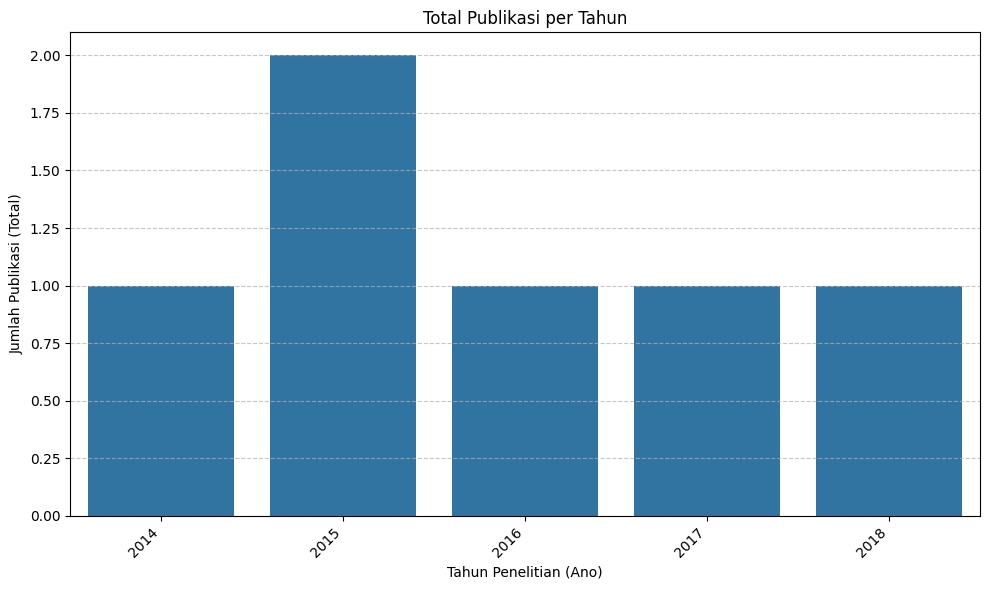

In [80]:

# --- Bagian 5: Visualisasi dengan Gráfico de Barra ---

# Plotting Publikasi Total per Tahun
plt.figure(figsize=(10, 6))
sns.barplot(x=publikasi_per_tahun.index, y=publikasi_per_tahun.values)
plt.title('Total Publikasi per Tahun')
plt.xlabel('Tahun Penelitian (Ano)')
plt.ylabel('Jumlah Publikasi (Total)')
plt.xticks(rotation=45, ha='right') # Memutar label tahun agar tidak tumpang tindih
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

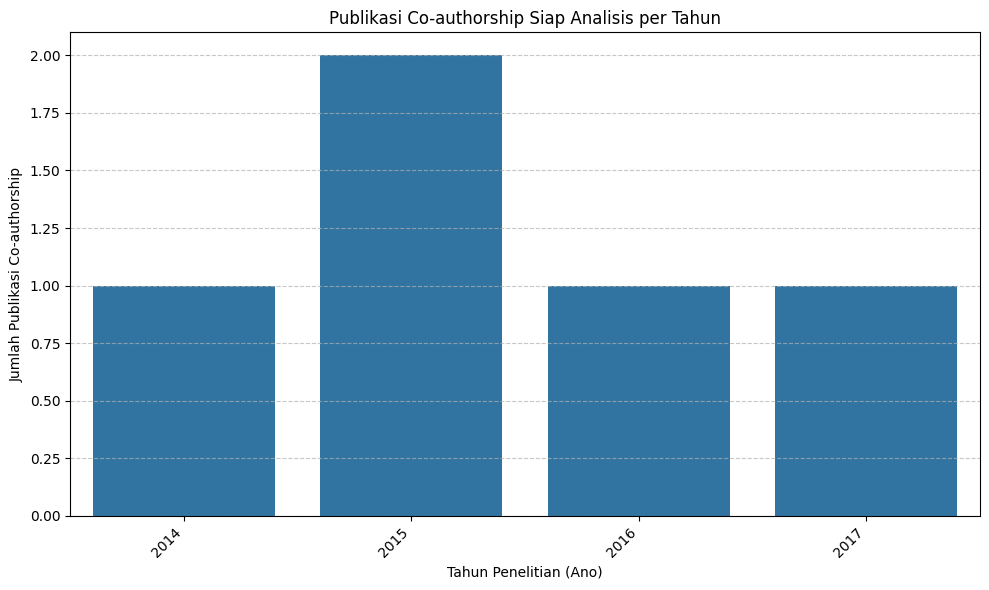

In [81]:
# Plotting Publikasi Co-authorship per Tahun
if not coauthorship_per_tahun.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coauthorship_per_tahun.index, y=coauthorship_per_tahun.values)
    plt.title('Publikasi Co-authorship Siap Analisis per Tahun')
    plt.xlabel('Tahun Penelitian (Ano)')
    plt.ylabel('Jumlah Publikasi Co-authorship')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("\nTidak ada data publikasi co-authorship yang 'Siap untuk analisis coauthorship' untuk divisualisasikan.")

In [84]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy untuk arange

# --- Bagian 1: Siapkan data pencocokan autor (Sama seperti sebelumnya) ---
autor_mapping_data = [
    {"nome": "Reginaldo Cordeiro dos Santos Filho",
     "nome_citacoes": "Santos Filho, R.C.; Filho, Reginaldo; Santos, Reginaldo.; Cordeiro dos Santos Filho, Reginaldo"},
    {"nome": "Helder Mateus dos Reis Matos",
     "nome_citacoes": "Matos, R.M.R.; Reis Matos, H.M.; Mateus dos Reis Matos, Helder"},
    {"nome": "Jean Carlos de Carvalho Costa",
     "nome_citacoes": "Costa, J.C.C.; Carvalho Costa, J.C.; Carlos de Carvalho, Jean"},
    {"nome": "Joaquim Armando Dlima Viana",
     "nome_citacoes": "Viana, J.A.D; Dlima Viana, J.A.; Armando Dlima Viana, Joaquim"},
    {"nome": "Samara Lima de Sousa",
     "nome_citacoes": "Souza, S.L.; Lima de Sousa, Samara"},
    {"nome": "Atílio Cardoso Azevedo",
     "nome_citacoes": "Azevedo, A.C.; Cardoso Azevedo, Atílio"},
    {"nome": "Iury Glabson",
     "nome_citacoes": "Glabson, I.; Glabson, Iuri"},
    {"nome": "Jeojildo Pereira",
     "nome_citacoes": "Pereira, J.; Pereira, Jeojildo"}
]

def normalize_name(name):
    name = name.lower()
    name = re.sub(r'[.,;]', '', name)
    name = re.sub(r'\s+', ' ', name)
    return name.strip()

autor_lookup = {}
for entry in autor_mapping_data:
    main_name = entry["nome"].strip()
    normalized_main_name = normalize_name(main_name)
    autor_lookup[normalized_main_name] = main_name

    citacoes = [c.strip() for c in entry["nome_citacoes"].split(';') if c.strip()]
    for cit in citacoes:
        normalized_cit = normalize_name(cit)
        autor_lookup[normalized_cit] = main_name

# --- Bagian 2: Ambil dan proses data XML (Sama seperti sebelumnya, kecuali bagian print) ---
url = 'https://raw.githubusercontent.com/jeojildo/trainingdata/refs/heads/main/coautorias3.xml'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'xml')
publicacoes = soup.find_all('publicacao')

all_publications_processed_data = []

for pub in publicacoes:
    ano = pub.ano.text.strip()
    titulo = pub.titulo.text.strip()
    autores_xml_original = [a.text.strip() for a in pub.find_all('autor')]

    matched_autores = []
    unmatched_autores = []

    for autor_name_from_xml in autores_xml_original:
        normalized_autor_xml = normalize_name(autor_name_from_xml)
        if normalized_autor_xml in autor_lookup:
            matched_autores.append(autor_lookup[normalized_autor_xml])
        else:
            unmatched_autores.append(autor_name_from_xml)

    unique_matched_autores = list(set(matched_autores))

    is_single_author_in_xml = (len(autores_xml_original) == 1)
    is_single_identified_author = (len(unique_matched_autores) == 1) and (len(autores_xml_original) > 1)

    publikasi_status = ""
    catatan_analisis_coauthorship = ""

    if is_single_author_in_xml:
        publikasi_status = "Publikasi dengan 1 autor"
        catatan_analisis_coauthorship = "Tidak akan digunakan untuk analisis coauthorship (publikasi tunggal)"
    elif is_single_identified_author:
        publikasi_status = "Co-authorship (hanya 1 autor teridentifikasi dari daftar)"
        catatan_analisis_coauthorship = "Tidak akan digunakan untuk analisis coauthorship (hanya 1 autor dari daftar)"
    elif len(unique_matched_autores) >= 2:
        publikasi_status = "Co-authorship"
        catatan_analisis_coauthorship = "Siap untuk analisis coauthorship"
    else:
        publikasi_status = "Co-authorship (tidak cukup autor teridentifikasi dari daftar)"
        catatan_analisis_coauthorship = "Tidak cukup autor teridentifikasi dari daftar untuk analisis coauthorship"

    all_publications_processed_data.append({
        'tahun': int(ano) if ano.isdigit() else None,
        'judul': titulo,
        'autor_xml_original': "; ".join(autores_xml_original),
        'jumlah_autor_xml': len(autores_xml_original),
        'autor_teridentifikasi': "; ".join(unique_matched_autores),
        'jumlah_autor_teridentifikasi': len(unique_matched_autores),
        'autor_tidak_teridentifikasi': "; ".join(unmatched_autores),
        'jumlah_autor_tidak_teridentifikasi': len(unmatched_autores),
        'status_publikasi': publikasi_status,
        'catatan_analisis_coauthorship': catatan_analisis_coauthorship
    })

# --- Bagian 3: Siapkan Data untuk Pre-processing dengan Pandas DataFrame ---
df = pd.DataFrame(all_publications_processed_data)

# Pre-processing dasar untuk visualisasi
df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce')
df = df.dropna(subset=['tahun'])
df['tahun'] = df['tahun'].astype(int)

# --- Bagian 4: Transformasi Data untuk Grafik Batang ---
publikasi_per_tahun = df['tahun'].value_counts().sort_index()
df_for_coauthorship = df[df['catatan_analisis_coauthorship'] == 'Siap untuk analisis coauthorship'].copy()
coauthorship_per_tahun = df_for_coauthorship['tahun'].value_counts().sort_index()

print("\n\n--- Data Siap untuk Visualisasi ---")
print("-" * 30)
print("\nJumlah Publikasi Total per Tahun:")
print(publikasi_per_tahun)
print("\nJumlah Publikasi Co-authorship (Siap Analisis) per Tahun:")
print(coauthorship_per_tahun)



--- Data Siap untuk Visualisasi ---
------------------------------

Jumlah Publikasi Total per Tahun:
tahun
2014    1
2015    2
2016    1
2017    1
2018    1
Name: count, dtype: int64

Jumlah Publikasi Co-authorship (Siap Analisis) per Tahun:
tahun
2014    1
2015    2
2016    1
2017    1
Name: count, dtype: int64


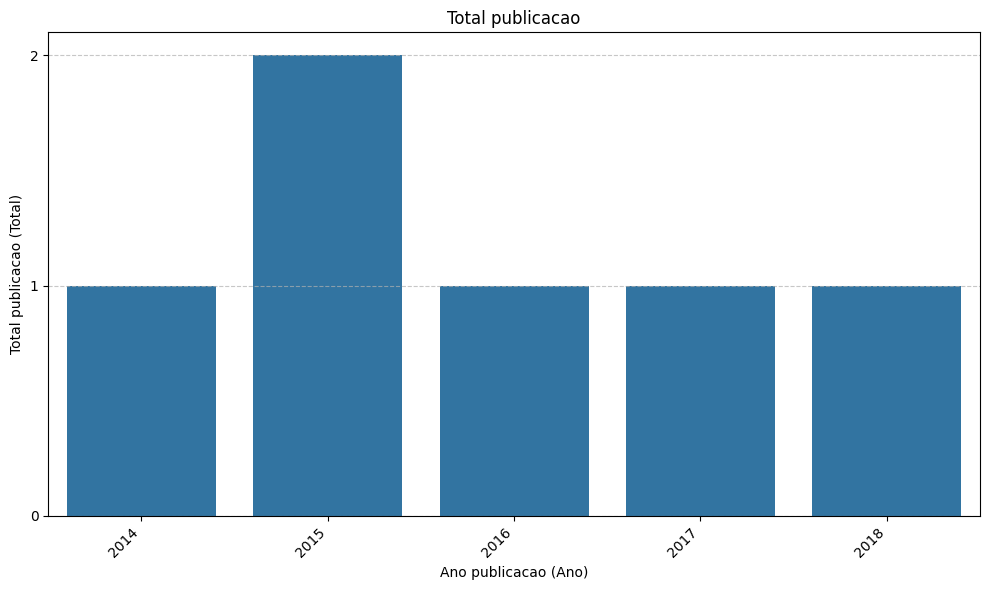

In [89]:
# --- Bagian 5: Visualisasi dengan Gráfico de Barra (dengan Perbaikan Sumbu Y) ---

# Plotting Publikasi Total per Tahun (tidak untuk dianalisis karena 2018 itu hanya 1 autor saja)
plt.figure(figsize=(10, 6))
sns.barplot(x=publikasi_per_tahun.index, y=publikasi_per_tahun.values)
plt.title('Total publicacao')
plt.xlabel('Ano publicacao (Ano)')
plt.ylabel('Total publicacao (Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- Perbaikan Penting: Menetapkan Ticks Sumbu Y sebagai Bilangan Bulat ---
# Tentukan rentang ticks dari 0 hingga nilai maksimum + 1, dengan langkah 1
max_y_total = publikasi_per_tahun.values.max()
plt.yticks(np.arange(0, max_y_total + 1, 1))
# --- End Perbaikan ---

plt.tight_layout()
plt.show()

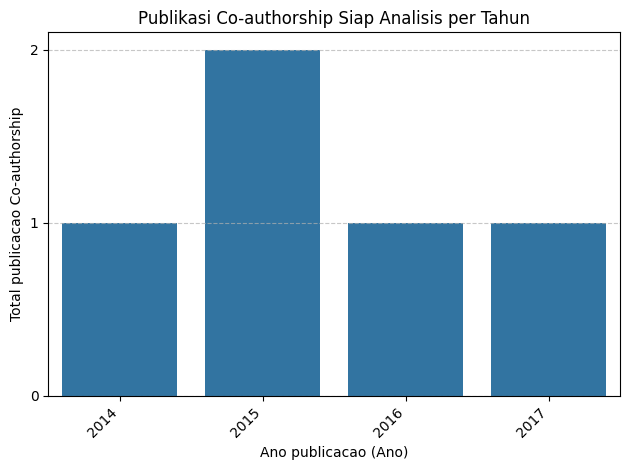

In [93]:
# Plotting Publikasi Co-authorship per Tahun(ini sudah excluir atau buang yang hanya 1 coautores)
if not coauthorship_per_tahun.empty:
    #plt.figure(figsize=(10, 6))#ida ne'ebe uza bebeik
    plt.figure(figsize=(6.4, 4.8)) #koko uza default
    sns.barplot(x=coauthorship_per_tahun.index, y=coauthorship_per_tahun.values)
    plt.title('Publikasi Co-authorship Siap Analisis per Tahun')
    plt.xlabel('Ano publicacao (Ano)')
    plt.ylabel('Total publicacao Co-authorship')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # --- Perbaikan Penting: Menetapkan Ticks Sumbu Y sebagai Bilangan Bulat ---
    max_y_coauthorship = coauthorship_per_tahun.values.max()
    plt.yticks(np.arange(0, max_y_coauthorship + 1, 1))
    # --- End Perbaikan ---

    plt.tight_layout()
    plt.show()

else:
    print("\nTidak ada data publikasi co-authorship yang 'Siap untuk analisis coauthorship' untuk divisualisasikan.")